<a href="https://colab.research.google.com/github/venkateshtantravahi/CNN-Architectures/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding and Implementation of AlexNet  

# Historic Content

AlexNet was not the first fast GPU-implementation of a CNN to win an image recognition contest. A CNN on GPU by k. chellapilla et al. (2006) was 4 times faster than an equivalent implementation on CPU. A deep CNN of __Dan Ciresan__ et al. (2011) at __IDSIA__ was already 60 times faster and achieved superhuman performance in August 2011. Between May 15, 2011 and september 10, 2012, thier CNN won no fewer than four image competitions.They also significantly improved on the best performance in the literature for multiple image __databases__.

According to the AlexNet paper, Ciresan earlier net is "somewhat similar". Both were originally written with __CUDA__ to run with __GPU__ support. In fact, both are actually just variants of the CNN designs introduced by __Yann LeCun__ et al. (1989) who applied the __backpropagation__ algorithm to a variant of kunihiko Fukushima's original CNN architecture called __"neocognitron"__. The architecture was later modified by J.Weng's method called __max-pooling__.

__AlexNet__ is the name of a __convolutional neural network__ designed by __Alex Krizhevsky__ in collaboration with __ilya Sutskever__ and __Geoffrey Hinton__ who was Krizhevsky's Ph.D. advisor.

AlexNet competed in the __imageNet Large Scale Visual Recognition CHallenge__ on September 30, 2012. The network achieved a top-5 error of 15.3%, more than 10.8% points lower than that of the runner  up. The original paper's primary result was that the depth of the model was essential for its high performance, which was computationally expensive, but made feasible due to the utilization of GPU during training.

In 2015, AlexNet was outperformed by __Microsoft Research Asia__'s very deep CNN with over 100 layers, which won the ImageNet 2015 contest.

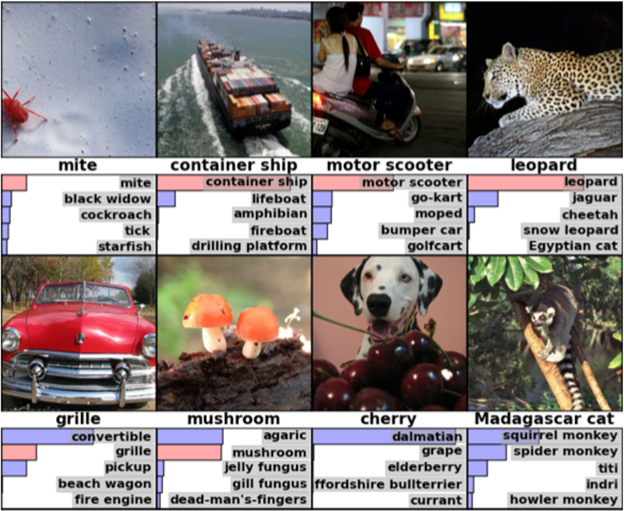

# Deepdive into Architecture

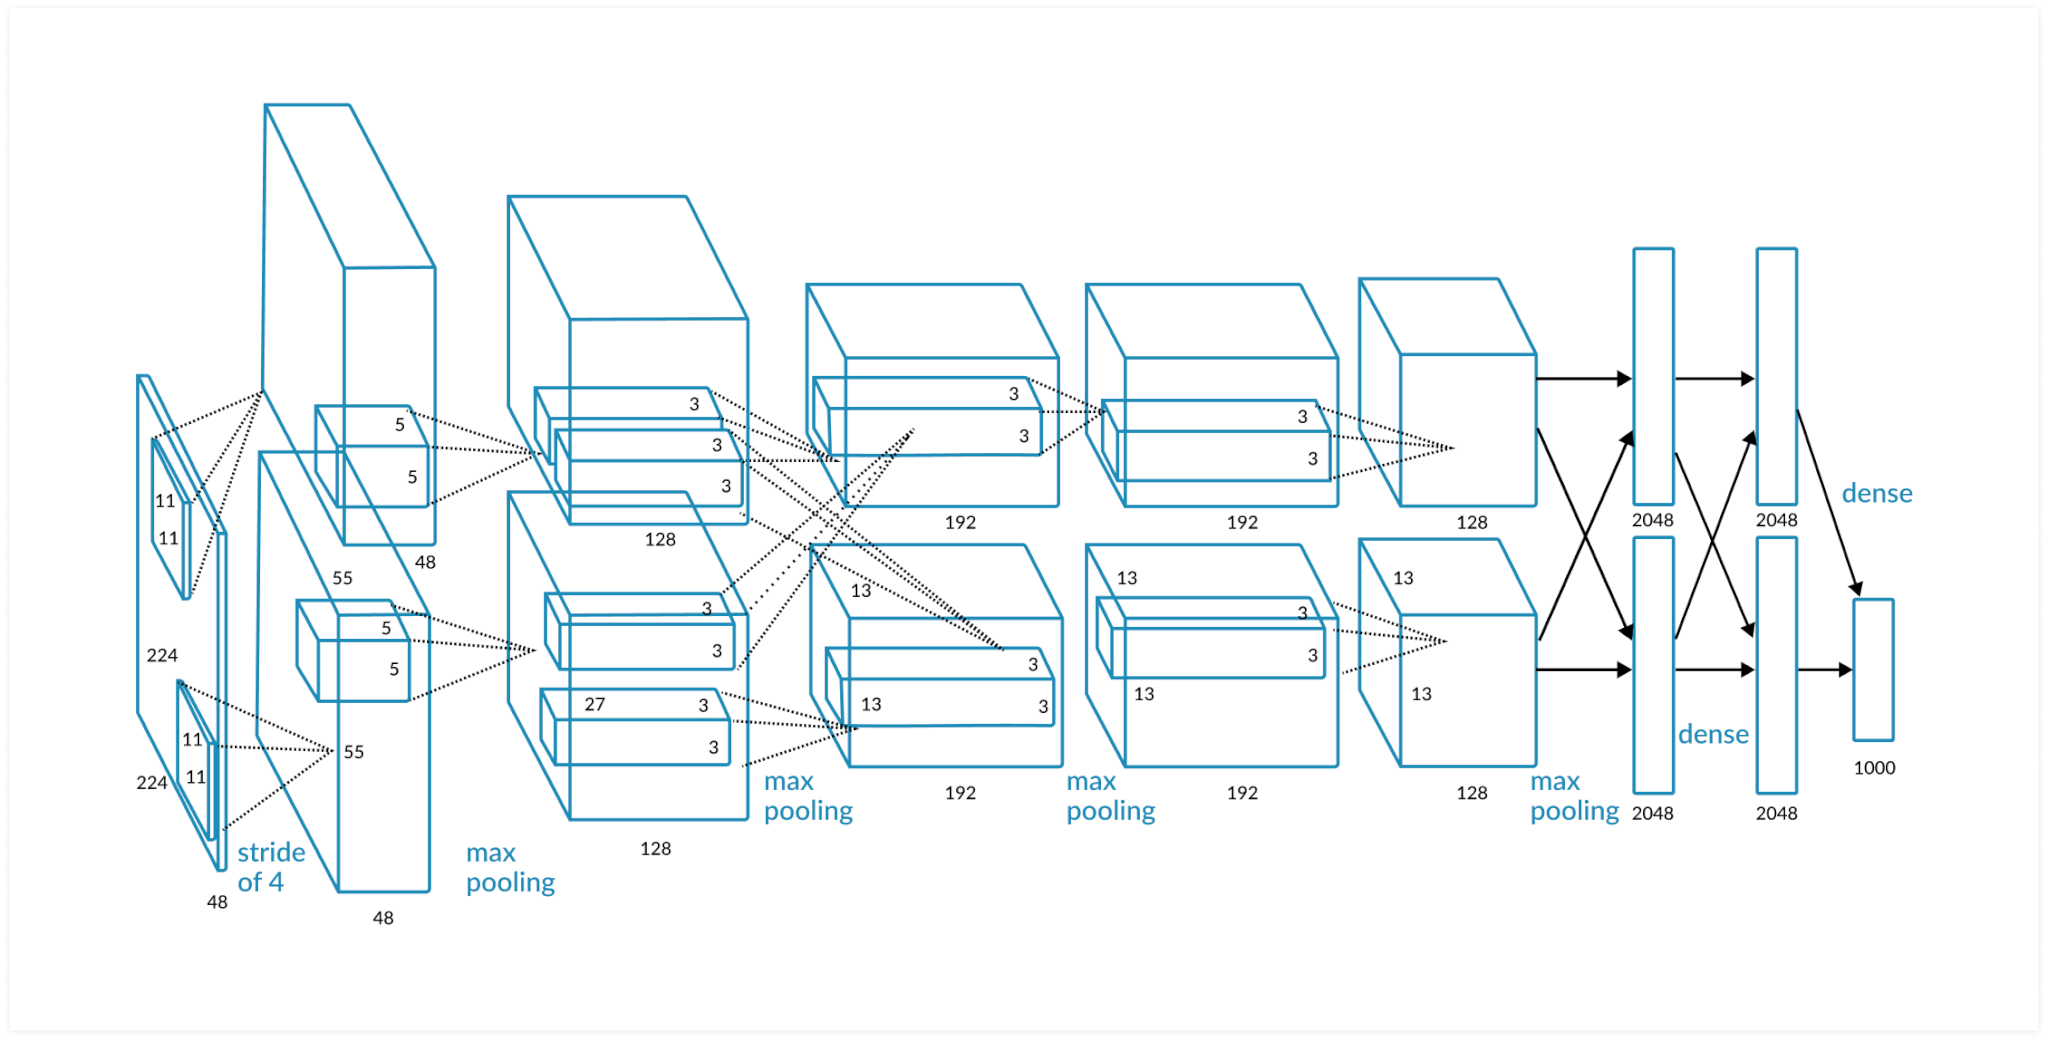

### Brief About layers
1. AlexNet architecture consist of 5 convolutional layers, 3 max-pooling layers, 2 normalization layers, 2 fully connected layers and 1 softma layer.
2. Each convolutional layer consist of convolutional filters and a nonlinear activation function ReLU.
3. The pooling layers are used to perform max-pooling.
4. Input size is fixed due to the presence of fully connected layers.
5. The input size is mentioned at most of th places as 224x224x3 but due to some padding which happens it works out to be 227x227x3
6. AlexNet overall has 60 million parameters. 

### Model Details
- The model which won the competition was tuned with specific details-
1. ReLU is an activation function.
2. Used Normalization layers which are not common anymore.
3. Batch size of 128
4. SGD Momemtum as learning algorithm
5. Heavy Data Augmentation with things like flipping, jittering, cropping, color normalization, etc.
6. Ensembling of models to get the best results.

AlexNet was trained on a GTX 580 GPU with only 3GB of memory which couldn't fit the entire network.So the network was split across 2 GPUs, with half of the neurons(feature maps) on each GPU.

# Key Features

### Overlapping Max Pooling

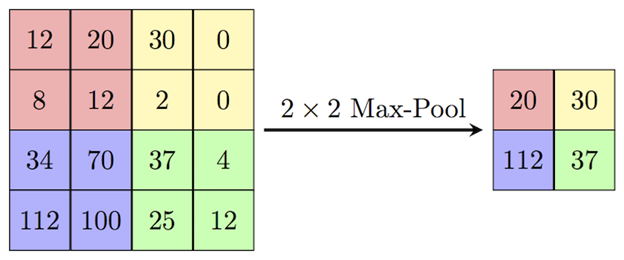

To down-sample an image or a representation, Max Pool is used.It reduces its dimensionality by allowing assumptions to be made about features contained in the sub-regions binned.

Overlapping Max-Pool layers are similar to MaxPool layers except the adjacent window over which the max is calculated overlaps with eachother. The authors of AlexNet used pooling windows, sized 3x3 with a stride of 2 between the adjacent windows.Due to this overlapping nature of Max Pool, the top-1 error rate was reduced by 0.4% and top-5 error rate was reduced by 0.3% respectively. If you compare this to using a non-overlapping pooling windows of size 2x2 with a stride of 2, that would give the same output dimensions.


## ReLU Nonlinearity

#### What is ReLU?
 ReLU or Rectified linear unit is an activation function, used in neural networks for model training. The main aim of using an activation function is to add nonlinearity in the network.

 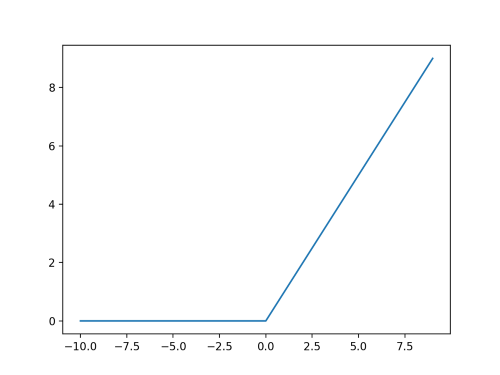

 ```
 ReLu Equation:
 y = max(0,x) --> eq (1)

 if x <=0, y=0
 else y=x
 ```

 ** In linear algebra, a linear function map between two vector if it fulfills the vector addition and scalar multiplication.

 ```
 f(x+y) = f(x) + f(y) --> eq (2)
 f(ax) = af(x) --> eq(3)
 ```

 If ReLU is a linear function, it should satisfy eq (2)

 ```
 Let x=3 and y=-5, f = ReLU activation function

 LHS = f(x+y) = f(3-5) = f(-2) = 0 --> according to eq (1)

 RHS = f(x) + f(y) = f(3) + f(-5) = 3 + 0 = 3

 LHS != RHS
 ```

 Hence, ReLu is a nonlinear function.

 Using ReLu non-linearity, AlexNet shows us that deep CNNs can be trained much faster with the help of saturating activation functions such as Tanh or sigmoid.The figure shown below shows us that with the help of ReLU(solid curve), AlexNet can achieve a 25% training error rate.This is six times faster than an equivalent network that uses tanh(dotted curve).This was tested on the CIFAR-10 dataset.

 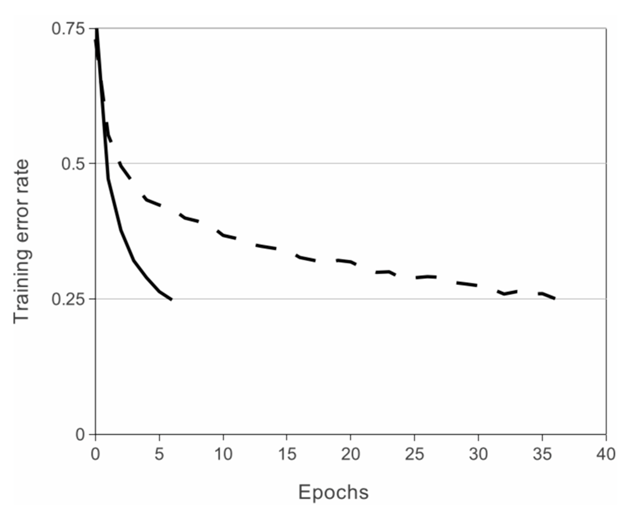

 ## Data Augmentation

 When you show a Neural Net different variations of the same image, it helps prevent overfitting.It also forces the Neural Net to memorize the key features and helps in generating additional data.

### Data Augmentation by Mirroring

Let's say we have an image of a cat in our training set. The mirror image is also a valid image of a cat.This means that we can double the size of the training datasets by simply flipping the image above the vertical axis.

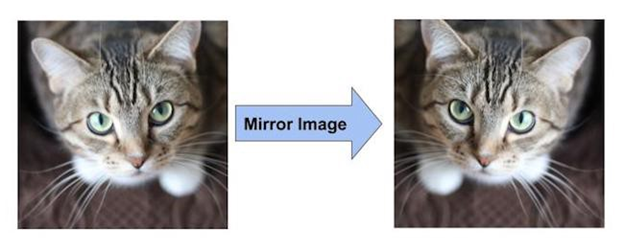


### Data Augmentation by Random Crops

Also, cropping the original image randomly will lead to additional data that just a shifted version of the original data.

The authors of AlexNet extracted random crops sized 227x227 from inside the 256x256 image boundary, and used this as the network's inputs.Using this method, they increased the size of the data by a factor of 2048.

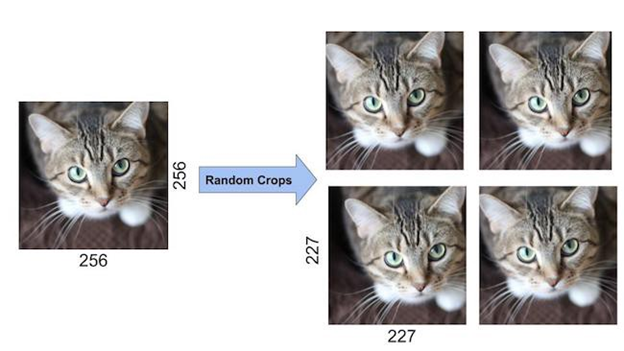

## Dropout

During dropout, a neuron is dropped from the Neural Network with a probability of 0.5. When a neuron is dropped, it does not contribute to forward propagation or backward propagation. Every input goes through a different Neural Network architecture, as shown in the image below. As a result, the learned weight parameters are more robust and do not get overfitted easily.


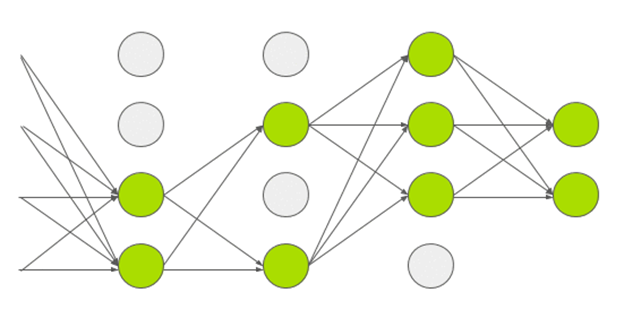

# Let's dig deep into implementation with Tensorflow and Keras

## 1. Tools and Libraries
We begin implementation by importing the following libraries:
- <u>Tensorflow:</u> An open-source platform for the implementation, training, and deployement of machine learning models.
- <u>Keras:</u> An open-source library used for the implementation of neural network architectures that run both on CPUs and GPUs.
- <u>Matplotlib:</u> A visualization python tool used for illustrating interactive charts and images.

In [1]:
import tensorflow as tf
import keras
import os
import time
import matplotlib.pyplot as plt

### 2.Dataset
<u>The CIFAR-10 dataset</u> contains 60,000 color images, each with dimensions 32x32px. The content of the images within the dataset is sampled from 10 classes.

The deep learning Keras library provides direct access to the CIFAR10 dataset with relative ease, through its <u>dataset module.</u> Accessing common datasets becomes easier with Keras.

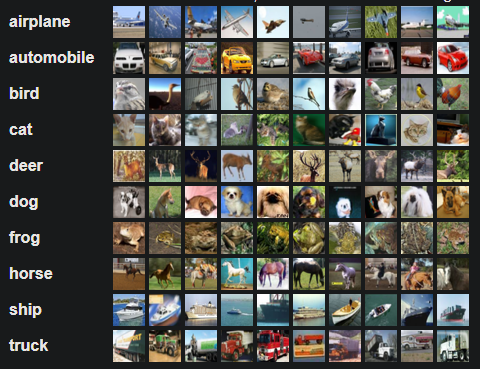

<u>Classes within the CIFAR-10 dataset</u>

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


To refer the class names of the images during visualizations stage, a python list containing the classes is initialized with the variable name ```CLASS_NAMES```

In [3]:
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

The CIFAR10 dataset is partitioned into 50,000 training data and 10,000 test data by default. The last partition of the dataset we require is the validation data.

The validation data is obtained by taking the last 5000 images within the training data.

In [4]:
validation_images, validation_labels = train_images[:5000],train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

__Training Dataset:__ This is the group of our dataset used to train the nueral network directly. Training data refers to the dataset partition exposed to the neural network during training.

__Validation Dataset:__ This group of the dataset is utilized during training to access the performance of the network at various iterations.

__Test Dataset:__ This partition of the dataset evaluates the performance of our network after the completion of the training phase.

Tensorflow provides a suite of functions and operations that enables easy data manipulation and modification through a defined input pipeline.

To be able to access these methods and procedures, it is required that we transform our dataset into an efficient data representation Tensorflow is familiar with.This is achieved using <u>tf.data.Dataset</u> API.

More specially, <u>tf.data.Dataset.from_tensor_slices</u> method takes the train, test, and validation dataset partitions and returns a corresponding Tensorflow Dataset representation.

In [5]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

# 3.Preprocessing

Preprocessing within any machine learning is associated with the transformation of data from one form to another.

Usually, preprocessing is conducted to ensure the data utilized is within an appropriate format.

First, let's visualize the images within the CIFAR10 dataset.

The code snippet below uses the Matplotlib library to present the pixel information of the data from five training images into actual images.There is also an indicator of the class each depicted content within the images belongs to.


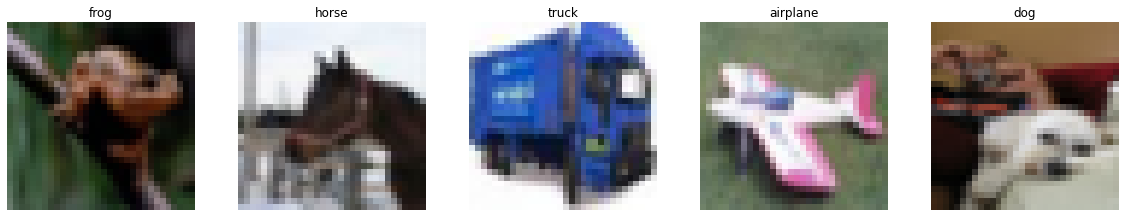

In [6]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(train_ds.take(5)):
  ax = plt.subplot(5,5,i+1)
  plt.imshow(image)
  plt.title(CLASS_NAMES[label.numpy()[0]])
  plt.axis('off')

In [7]:
def process_images(image, label):
  #Normalize images to have a mean of 0 and standard deviation of 1

  image = tf.image.per_image_standardization(image)
  #Resize images from 32x32 to 277x277
  image = tf.image.resize(image, (227,227))
  return image, label

In [8]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", validation_ds_size)

Training data size: 45000
Test data size: 10000
Validation data size: 5000


**For our basic input/data pipeline, we will conduct three primary operations:**
1. __Preprocessing the data within the dataset__
2. __Shuffle the dataset__
3. __Batch data within the dataset__

In [9]:
train_ds = (train_ds
            .map(process_images)
            .shuffle(buffer_size=train_ds_size)
            .batch(batch_size=32, drop_remainder=True))

test_ds = (test_ds
           .map(process_images)
           .shuffle(buffer_size=train_ds_size)
           .batch(batch_size=32, drop_remainder=True))

validation_ds = (validation_ds
                 .map(process_images)
                 .shuffle(buffer_size=train_ds_size)
                 .batch(batch_size=32, drop_remainder=True))

# Model Implementation

Within this section, we will implement the AlexNet CNN architecture from scratch.

Through the utilization of <u>Keras Sequential API</u>, we can implement consequtive neural network layers with our models that are stacked against each other.



In [10]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
                                 keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding='same'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
                                 keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding='same'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding='same'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(4096, activation='relu'),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(4096, activation='relu'),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(10, activation='softmax')
])

# TensorBoard
At this point, we have the custom AlexNet network implemented.

Before we proceed onto training, validation, and evaluation of the network with data, we first have to set up some monitoring facilities.

<u>TensorBoard</u> is a tool that provides a suite of visualization and monitoring mechanisms.For the work in this tutorial, we'll be utilizing Tensorboard to monitor the progress of the training the network.

More specifically, we'll be monitoring the following metrics: training loss, training accuracy, validation loss, validation accuracy.

In the shortcode snippet below we are creating a refernce to the directory we would like all TensorBoard files to be stored within.The function ```get_run_logdir``` returns the location of the exact direcotry that is named according to the current time the training phase starts.

To complete this current process, we pass the directory to store Tensorboard related files for a particular training session to the <u>TensorBoard callback.</u>

In [11]:
root_logdir = os.path.join(os.curdir, "logs\\fit\\")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
    
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

# Training and Results
To train the network, we have to compile it.

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

# Complete Implementation

In [13]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_5 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
activation (Activation)      (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_6 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 256)        

In [14]:
# Compiling the model
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [15]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [16]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [17]:
#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [18]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5)

In [19]:
#Defining the parameters
batch_size= 100
epochs=100
learn_rate=.001

In [20]:
#Training the model
AlexNet.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size), epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size), validation_steps = 250, callbacks = [lrr], verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
350/350 [==============================] - 30s 61ms/step - loss: 1.8143 - accuracy: 0.3419 - val_loss: 2.0766 - val_accuracy: 0.2705
Epoch 2/100
350/350 [==============================] - 16s 45ms/step - loss: 1.4247 - accuracy: 0.4983
Epoch 3/100
350/350 [==============================] - 16s 44ms/step - loss: 1.3036 - accuracy: 0.5479
Epoch 4/100
350/350 [==============================] - 16s 45ms/step - loss: 1.2090 - accuracy: 0.5837
Epoch 5/100
350/350 [==============================] - 15s 44ms/step - loss: 1.1271 - accuracy: 0.6125
Epoch 6/100
350/350 [==============================] - 15s 44ms/step - loss: 1.0617 - accuracy: 0.6313
Epoch 7/100
350/350 [==============================] - 15s 44ms/step - loss: 1.0104 - accuracy: 0.6514
Epoch 8/100
350/350 [==============================] - 16s 44ms/step - loss: 0.9674 - accuracy: 0.6682
Epoch 9/100
350/350 [==============================] - 15s 44ms/step - loss: 0.9226 - accuracy: 0.6866
Epoch 10/100
350/350 [=========